# Digital Image Processing(DIP) - Basics using Jupyter Notebook

Contributer(s): Deep Patel

Organization  : Indian Institute of Information Technology, Raichur

Last Modified : January 16th, 2024

In [1]:
import cv2      #Computer Vision Library
from matplotlib import pyplot as plt
import numpy as np

OpenCV reads images in the BGR (Blue, Green, Red) format, while Matplotlib expects images in the RGB (Red, Green, Blue) format for display. Therefore, when you directly use plt.imshow(img), the colors might appear different.

You can use cv2.cvtColor to convert the image from BGR to RGB before displaying it with Matplotlib.

In [2]:
img_bgr = cv2.imread("img/cat.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print(img_rgb.shape)   # 3-Dimensional

(1536, 1537, 3)


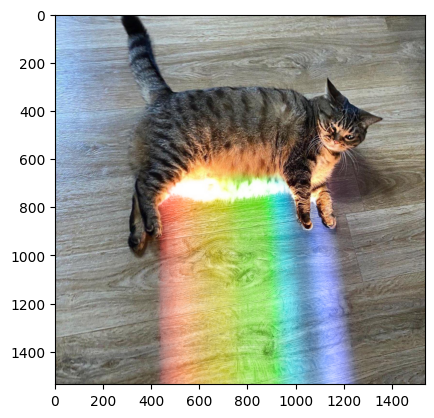

In [3]:
plt.imshow(img_rgb)

# Converting to Grayscale

If you want to display the grayscale version of the image using plt.imshow(grey), you need to ensure that Matplotlib knows it's a grayscale image. Matplotlib may not automatically handle the colormap for grayscale images. You can explicitly specify the colormap using the cmap parameter.

In [4]:
grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

print(grey.shape)   # 2-Dimensional

(1536, 1537)


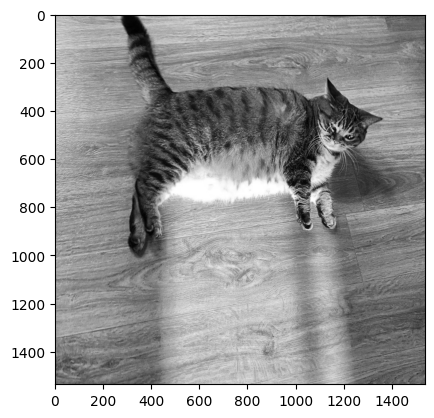

In [5]:
plt.imshow(grey, cmap='gray')

# RGB Color Channels

The RGB color model, comprising Red, Green, and Blue channels, is a fundamental representation of colors in digital images. Each channel corresponds to the intensity of its respective color, with variations producing a diverse spectrum of hues. In a full-color RGB image, pixels are defined by three values, representing their red, green, and blue intensities. Manipulating these channels allows for color adjustments, image enhancements, and various image processing tasks. 

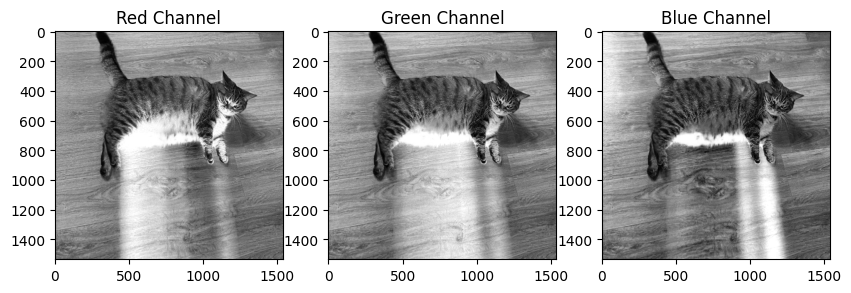

In [6]:
imgRed = img_rgb[:,:,0]
imgGreen = img_rgb[:,:,1]
imgBlue = img_rgb[:,:,2]

plt.figure(figsize=(10, 3))

plt.subplot(131)
plt.imshow(imgRed, cmap='gray')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(imgGreen, cmap='gray')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(imgBlue, cmap='gray')
plt.title('Blue Channel')

plt.show()

# Image Resizing

In [7]:
img_resize = cv2.resize(img_rgb,(15360, 15370))

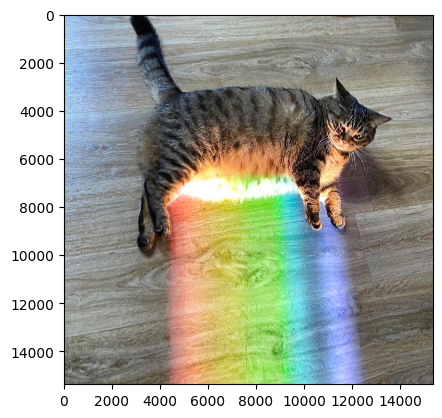

In [8]:
plt.imshow(img_resize)
plt.show()

In [9]:
img_resize1 = cv2.resize(img_rgb,(img_rgb.shape[1]//2, img_rgb.shape[0]//2))

In [10]:
print(img_resize1.shape)

(768, 768, 3)


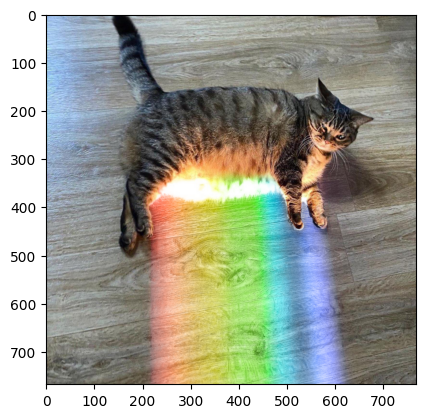

In [11]:
plt.imshow(img_resize1)
plt.show()

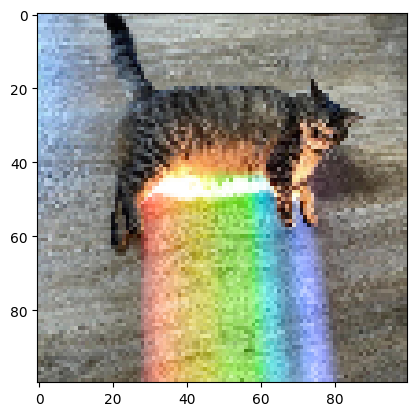

In [12]:
img_resize = cv2.resize(img_rgb,(100, 100))
plt.imshow(img_resize)
plt.show()

# Image Flipping

For vertical flip = 0; for horizontal flip = 1

In [13]:
img_flip_v = cv2.flip(img_rgb,0)
img_flip_h = cv2.flip(img_rgb,1)

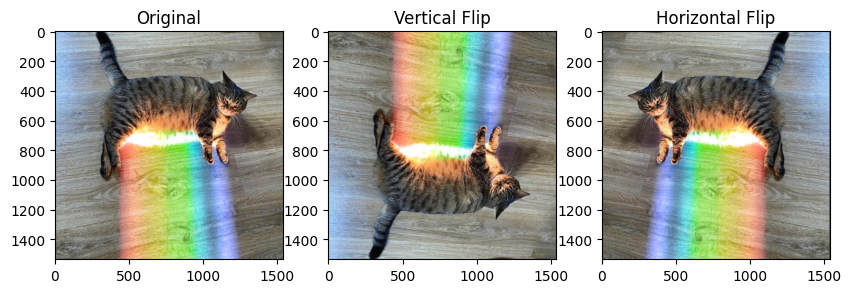

In [14]:
plt.figure(figsize=(10, 3))

plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Original')

plt.subplot(132)
plt.imshow(img_flip_v)
plt.title('Vertical Flip')

plt.subplot(133)
plt.imshow(img_flip_h)
plt.title('Horizontal Flip')

plt.show()

# Image Cropping

Define the region to be cropped using array indexing using [y1:y2, x1:x2] where y1, y2 = height indices, x1, x2 = width indices.

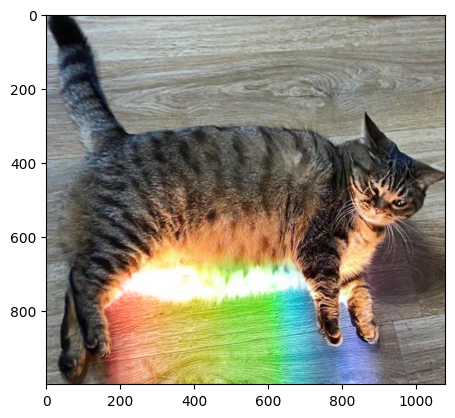

In [15]:
img_crop = img_rgb[0:1000, 270:1350]

plt.imshow(img_crop)
plt.show()

# Image Saving

We were using the RGB version of the original image till now. Since OpenCV uses BGR, before saving the image, we'll convert from RGB to BGR.

In [16]:
img_crop_bgr = cv2.cvtColor(img_crop, cv2.COLOR_RGB2BGR)
cv2.imwrite("img/cropped_cat.png", img_crop_bgr)

True

# Drawing Shapes

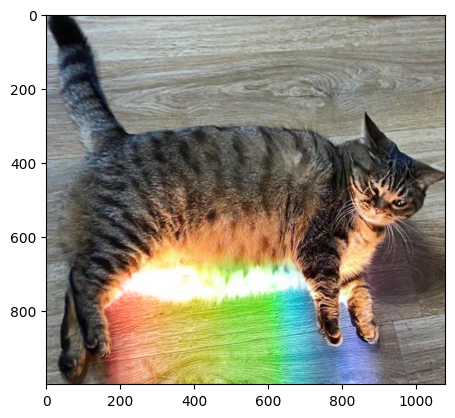

In [17]:
chonk_bgr = cv2.imread("img/cropped_cat.png")
chonk = cv2.cvtColor(chonk_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(chonk)
plt.show()

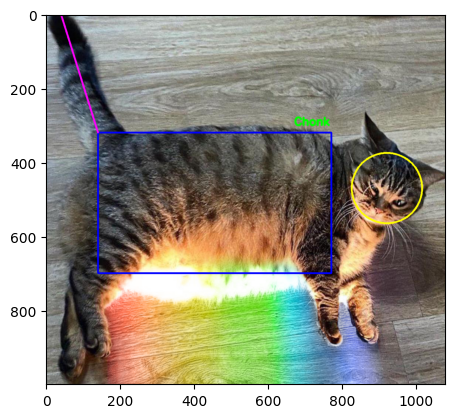

In [18]:
cv2.rectangle(chonk,pt1=(140,320),pt2=(770,700),color=(0,0,255),thickness=3)
cv2.circle(chonk,center=(920,470),radius=95,color=(255,255,0),thickness=3)
cv2.line(chonk,pt1=(40,0),pt2=(140,320),color=(255,0,255),thickness=3)
cv2.putText(chonk, text="Chonk", org=(670,300), fontFace=cv2.FONT_ITALIC, fontScale=1, color=(0,255,0), thickness=4, lineType=cv2.LINE_AA)

plt.imshow(chonk)
plt.show()

# Live Direct Drawing

Interacting with image through any event (for eg., mouse click, drag etc.)

In [19]:
#Use click, double click, right click and double right click to see magic

def draw(event,x,y,flags,params):
    if event==1:
        cv2.circle(img,center=(x,y),radius=10,color=(255,255,255),thickness=1)
    elif event==7:
        cv2.circle(img,center=(x,y),radius=10,color=(255,0,0),thickness=1)
        cv2.circle(img,center=(x,y),radius=20,color=(0,255,0),thickness=1)
        cv2.circle(img,center=(x,y),radius=30,color=(0,255,255),thickness=1)
        cv2.circle(img,center=(x,y),radius=40,color=(0,0,255),thickness=1)
    elif event==2:
        cv2.rectangle(img,pt1=(x-10,y-10),pt2=(x+10,y+10),color=(0,0,255),thickness=3)
    elif event==8:
        cv2.rectangle(img,pt1=(x-10,y-10),pt2=(x+10,y+10),color=(0,0,255),thickness=3)
        cv2.rectangle(img,pt1=(x-20,y-20),pt2=(x+20,y+20),color=(0,0,255),thickness=3)
        cv2.rectangle(img,pt1=(x-30,y-30),pt2=(x+30,y+30),color=(0,0,255),thickness=3)
        cv2.rectangle(img,pt1=(x-40,y-40),pt2=(x+40,y+40),color=(0,0,255),thickness=3)
    
cv2.namedWindow(winname="Live Direct Drawing")
cv2.setMouseCallback("Live Direct Drawing", draw)

img= np.zeros((512,512,3))

while True:
    cv2.imshow("Live Direct Drawing", img)
    if cv2.waitKey(1) & 0xFF == ord('x'):  #press 'x' on keyboard to exit
        break
cv2.destroyAllWindows()

In [20]:
#Draw a rectangle by mouse drag

flag = False
ix=-1
iy=-1

def rectangle(event,x,y,flags,params):
    
    global flag, ix, iy
    
    if event==1:
        flag = True
        ix=x
        iy=y
        
    elif event==0:
        
        if flag == True:
            cv2.rectangle(img,pt1=(ix,iy),pt2=(x,y),color=(0,255,255),thickness=-1)
        
    elif event==4:
        flag = False
        cv2.rectangle(img,pt1=(ix,iy),pt2=(x,y),color=(0,255,255),thickness=-1)

    
cv2.namedWindow(winname="rectangle")
cv2.setMouseCallback("rectangle", rectangle)

img= np.zeros((512,512,3))

while True:
    cv2.imshow("rectangle", img)
    if cv2.waitKey(1) & 0xFF == ord('x'):  #press 'x' on keyboard to exit
        break
cv2.destroyAllWindows()

In [21]:
#Only output the last rectangle unlike the above one where it prints all the rectangle while dragging

import cv2
import numpy as np

flag = False
ix = -1
iy = -1
last_rect = []
img = np.zeros((512, 512, 3))

def rectangle(event, x, y, flags, params):
    global flag, ix, iy, last_rect

    if event == 1:
        flag = True
        ix, iy = x, y

    elif event == 4:
        if flag:
            rect = ((ix, iy), (x, y))
            last_rect.append(rect)
            cv2.rectangle(img, pt1=rect[0], pt2=rect[1], color=(0, 255, 255), thickness=-1)
            flag = False

cv2.namedWindow(winname="rectangle")
cv2.setMouseCallback("rectangle", rectangle)

while True:
    cv2.imshow("rectangle", img.copy())  # Use img.copy() to avoid modifying the original image
    
    if cv2.waitKey(1) & 0xFF == ord('x'): #press 'x' on keyboard to exit
        break

cv2.destroyAllWindows()